In [1]:
# !nvidia-smi
# 
# import os
# # 只使用第三块GPU。
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
# !pip install numpy==1.22.0

In [3]:
# 导入所需的包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
# 读取数据
attachment1 = pd.read_excel("CUMCM2023Problems/C题/6 个蔬菜品类的商品信息.xlsx")
attachment2 = pd.read_excel("CUMCM2023Problems/C题/销售流水明细数据.xlsx")
attachment3 = pd.read_excel("CUMCM2023Problems/C题/蔬菜类商品的批发价格.xlsx")
attachment4 = pd.read_excel("CUMCM2023Problems/C题/蔬菜类商品的近期损耗率.xlsx")

首先，您需要对数据进行归一化，并将时间序列数据转换为LSTM可以处理的格式。

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM


# Load the data
daily_sales = attachment2
# Group by the date and product ID to get daily sales volume for each product
daily_sales = daily_sales.groupby(['销售日期', '单品编码'])['销量(千克)'].sum().reset_index()

# Merge with attachment1 to get the category information
daily_sales = daily_sales.merge(attachment1, on='单品编码', how='left')

# Grouping the data by category and date
category_sales = daily_sales.groupby(['销售日期', '分类名称'])['销量(千克)'].sum().unstack()
look_back=3

category_sales=category_sales.fillna(0)
# # 数据归一化
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(category_sales.values.reshape(-1, 1))
# 将时间序列数据转换为LSTM所需的格式
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

X, y = create_dataset(scaled_data, look_back)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Load the data
daily_sales = attachment2
# Group by the date and product ID to get daily sales volume for each product
daily_sales = daily_sales.groupby(['销售日期', '单品编码'])['销量(千克)'].sum().reset_index()

# Merge with attachment1 to get the category information
daily_sales = daily_sales.merge(attachment1, on='单品编码', how='left')

# Grouping the data by category and date
category_sales = daily_sales.groupby(['销售日期', '分类名称'])['销量(千克)'].sum().unstack()
category_sales=category_sales.fillna(0)
# # 数据归一化
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(category_sales.values.reshape(-1, 1))
# 将时间序列数据转换为LSTM所需的格式
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

X, y = create_dataset(scaled_data, look_back)

In [16]:
# 将数据划分为训练集和测试集
train_size = int(len(X) * 0.67)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# 创建LSTM模型
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=25, verbose=2)


Epoch 1/100
175/175 - 2s - loss: 0.0026 - 2s/epoch - 10ms/step
Epoch 2/100
175/175 - 0s - loss: 0.0023 - 191ms/epoch - 1ms/step
Epoch 3/100
175/175 - 0s - loss: 0.0023 - 185ms/epoch - 1ms/step
Epoch 4/100
175/175 - 0s - loss: 0.0022 - 184ms/epoch - 1ms/step
Epoch 5/100
175/175 - 0s - loss: 0.0022 - 188ms/epoch - 1ms/step
Epoch 6/100
175/175 - 0s - loss: 0.0022 - 189ms/epoch - 1ms/step
Epoch 7/100
175/175 - 0s - loss: 0.0022 - 185ms/epoch - 1ms/step
Epoch 8/100
175/175 - 0s - loss: 0.0022 - 186ms/epoch - 1ms/step
Epoch 9/100
175/175 - 0s - loss: 0.0022 - 188ms/epoch - 1ms/step
Epoch 10/100
175/175 - 0s - loss: 0.0022 - 186ms/epoch - 1ms/step
Epoch 11/100
175/175 - 0s - loss: 0.0022 - 184ms/epoch - 1ms/step
Epoch 12/100
175/175 - 0s - loss: 0.0022 - 189ms/epoch - 1ms/step
Epoch 13/100
175/175 - 0s - loss: 0.0022 - 188ms/epoch - 1ms/step
Epoch 14/100
175/175 - 0s - loss: 0.0022 - 183ms/epoch - 1ms/step
Epoch 15/100
175/175 - 0s - loss: 0.0022 - 192ms/epoch - 1ms/step
Epoch 16/100
175/175 

In [17]:
# model.save('/kaggle/working/model')

In [18]:
# from keras.models import load_model
# model = load_model('/kaggle/working/model')

In [19]:
# 预测
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# 反归一化
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# 计算root mean squared error
train_score = np.sqrt(np.mean((train_predict-y_train)**2))
print('Train Score: %.2f RMSE' % (train_score))
test_score = np.sqrt(np.mean((test_predict-y_test)**2))
print('Test Score: %.2f RMSE' % (test_score))



68/68 [==============================] - 0s 685us/step
Train Score: 65.63 RMSE
Test Score: 99.01 RMSE


4366
6509


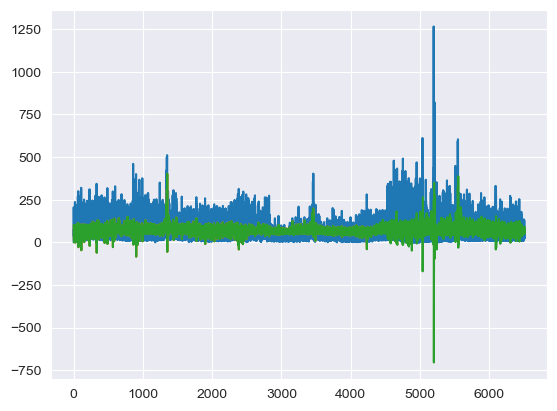

In [27]:
# 绘图
# plt.plot(scaler.inverse_transform(scaled_data))
train_predict_plot = np.empty_like(scaled_data)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict)+look_back, :] = train_predict

print(len(train_predict)+(look_back*2)+1)
print(len(scaled_data)-1)
test_predict_plot = np.empty_like(scaled_data)
test_predict_plot[len(train_predict)+(look_back)+1:len(scaled_data), :] = test_predict

# plt.plot(train_predict_plot)
# plt.plot(test_predict_plot)
plt.show()

2. 建立LSTM模型
接下来，您需要定义LSTM的结构并编译模型。

3. 训练模型
使用您的训练数据训练LSTM模型。

4. 进行预测
使用训练好的LSTM模型对测试数据进行预测。

预测未来一周的销售量：

使用LSTM或其他时间序列预测模型预测每个蔬菜品类的未来一周销售量。
确定补货策略：

基于预测销售量，加上安全库存（以应对预测误差）来确定补货量。
考虑损耗率来进一步调整补货量。例如，如果某个蔬菜的损耗率为10%，那么您可能需要增加10%的补货量以应对这种损耗。
制定定价策略：

使用“成本加成定价”方法：先确定每个蔬菜品类的成本，然后加上预期的利润率来确定售价。
考虑市场竞争、季节性因素和其他因素来调整价格。
如果蔬菜品相变差，可以提供折扣以加速销售。
也可以考虑使用动态定价策略，例如，如果某天销售量低于预期，可以稍微降低价格以吸引更多顾客。
最大化收益的策略：

根据预测的销售量、定价策略和成本来模拟未来一周的预期收益。
使用优化算法（如线性规划）来确定能够最大化收益的最佳定价和补货策略。

In [21]:
import os
import zipfile
import datetime

def file2zip(packagePath, zipPath):
    '''
  :param packagePath: 文件夹路径
  :param zipPath: 压缩包路径
  :return:
  '''
    zip = zipfile.ZipFile(zipPath, 'w', zipfile.ZIP_DEFLATED)
    for path, dirNames, fileNames in os.walk(packagePath):
        fpath = path.replace(packagePath, '')
        for name in fileNames:
            fullName = os.path.join(path, name)
            name = fpath + '\\' + name
            zip.write(fullName, name)
    zip.close()


if __name__ == "__main__":
    # 文件夹路径
    packagePath = '/kaggle/working/'
    zipPath = '/kaggle/working/output.zip'
    if os.path.exists(zipPath):
        os.remove(zipPath)
    file2zip(packagePath, zipPath)
    print("打包完成")
    print(datetime.datetime.utcnow())


打包完成
2023-09-09 17:57:33.159893
